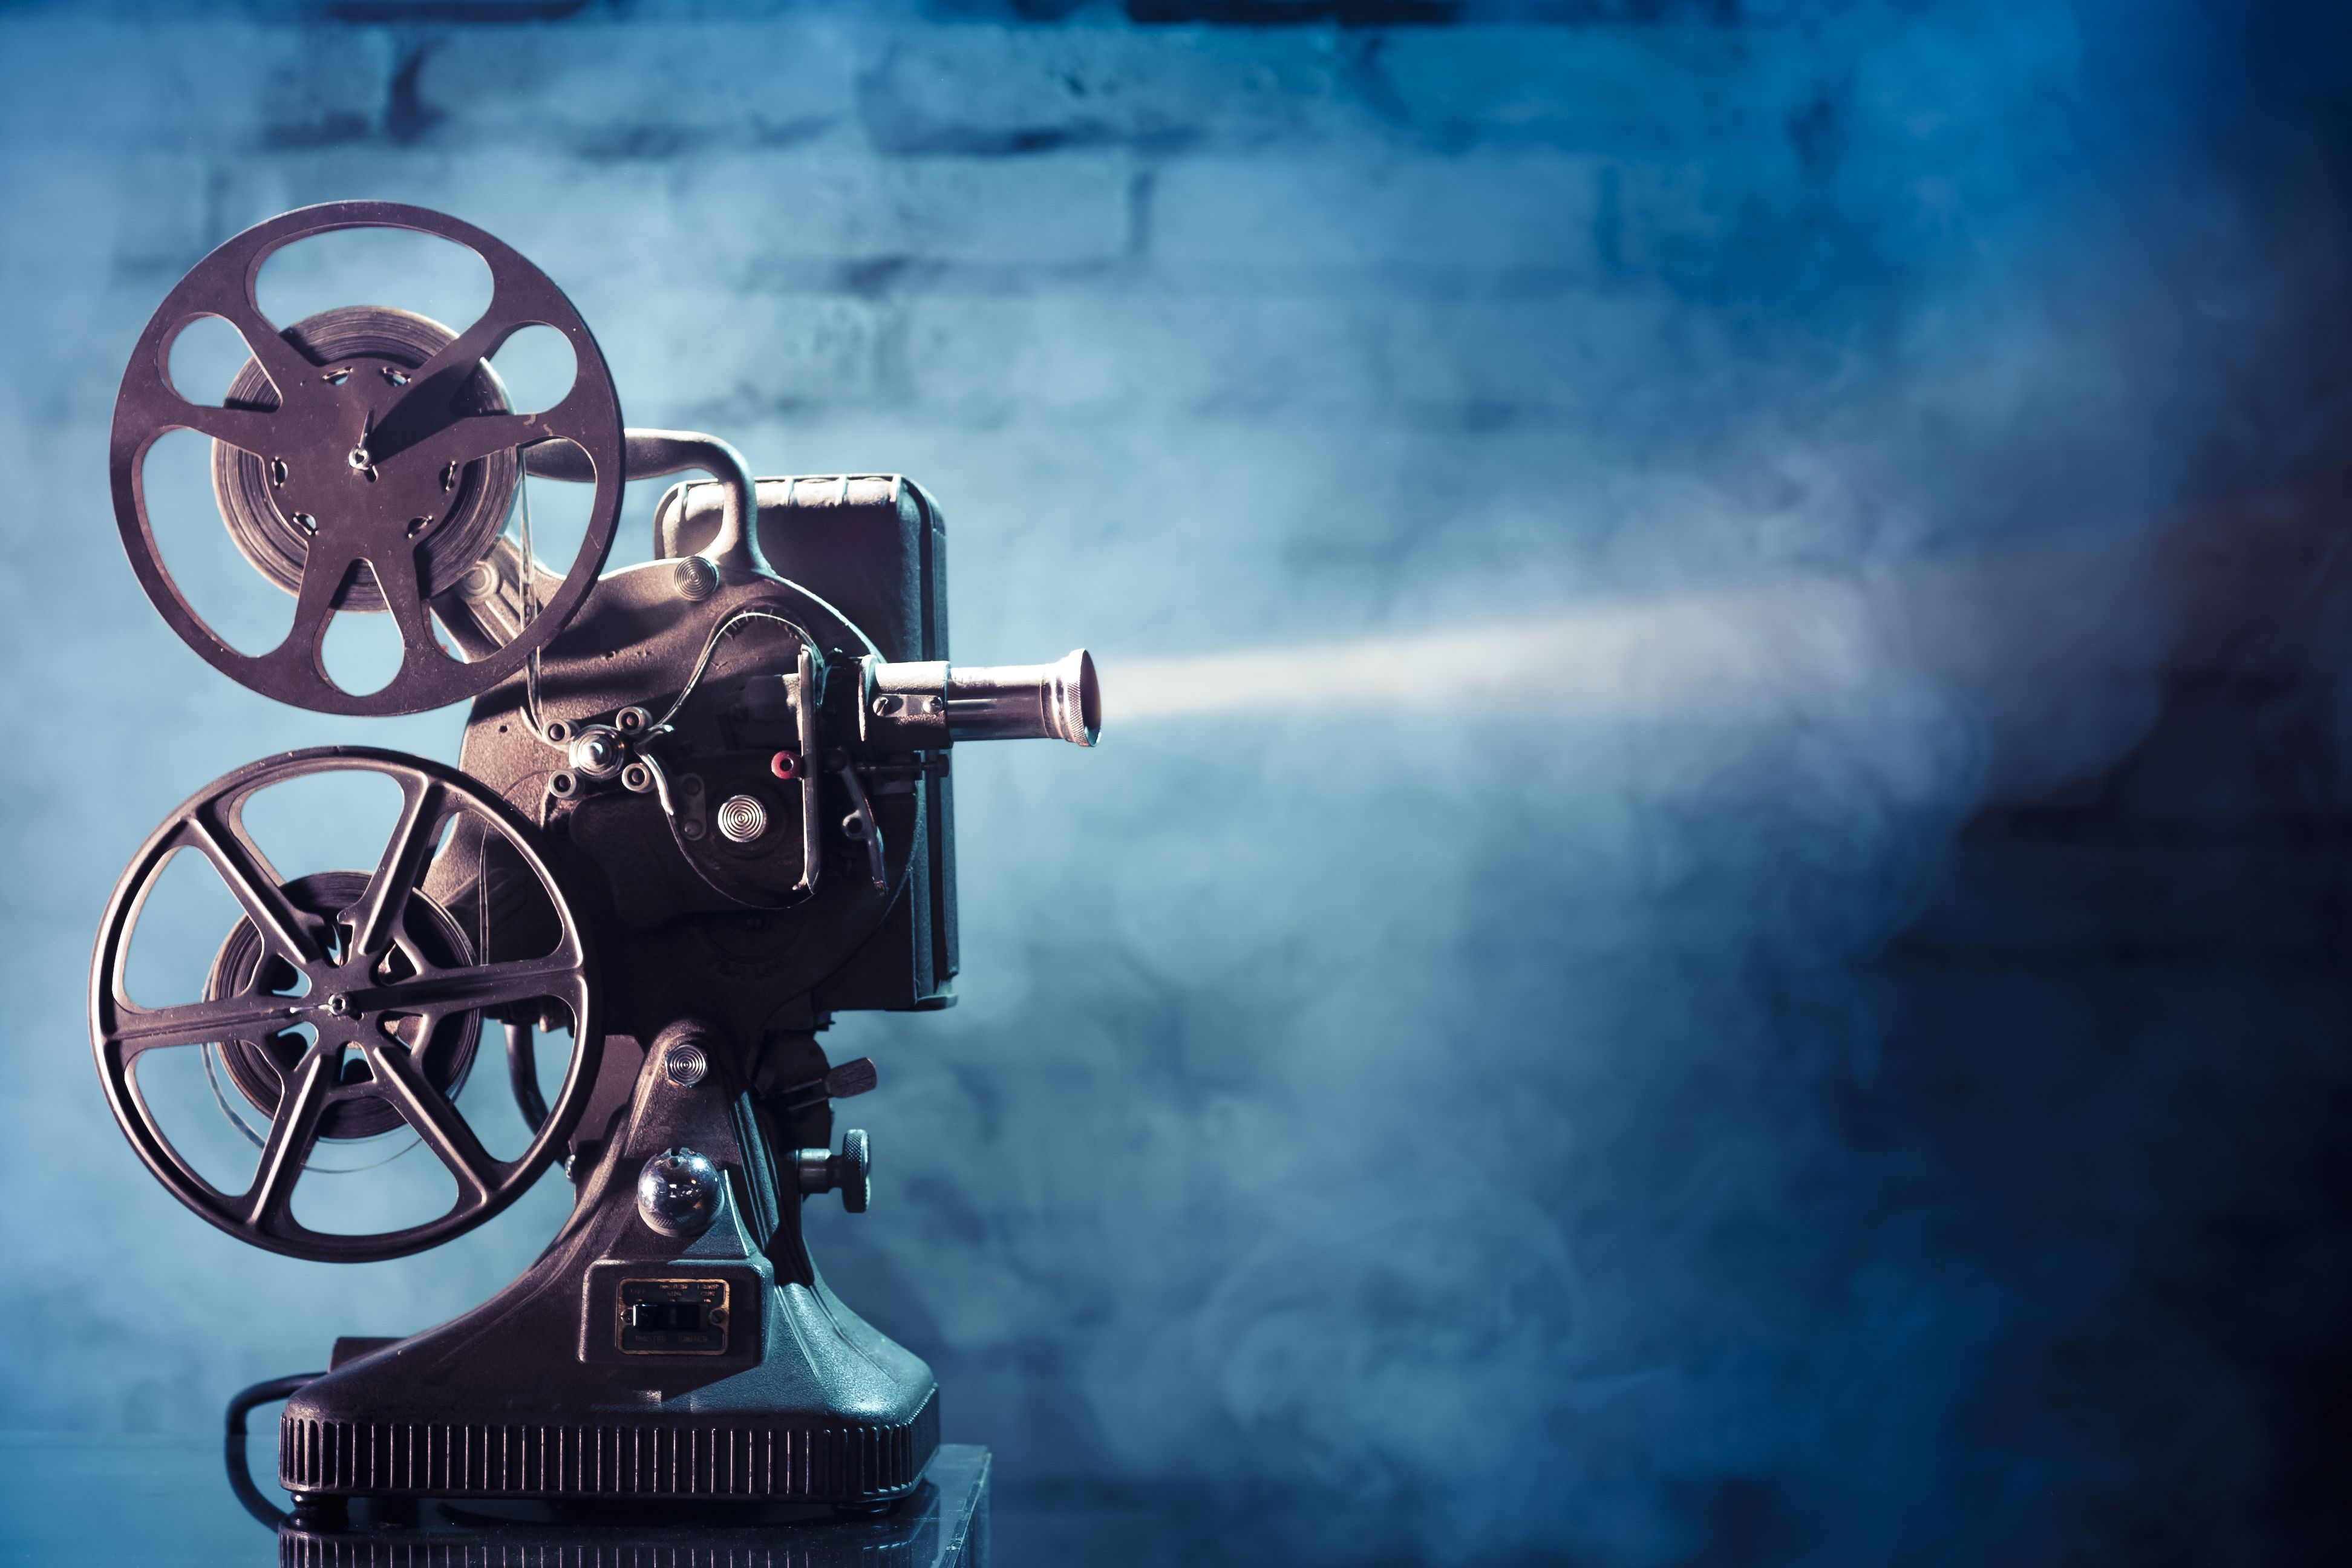

In [1]:
# add notebook image
from IPython.display import Image, display

display(Image(filename='movie.jpg.jpg'))

                    
                       PHASE 2 PROJECT 
                       
                📽️ MOVIES DATA ANALYSIS FOR NEW STUDIO
                   
 Generating data-driven insights for a new movie studio.


    Project Overview 💼
    
   Our company is seeking to venture into film production by launching a new movie studio. However, given the competitive market, we have to leverage data-driven insights to drive the excercise. In this project, movie industry data will be analysed to uncover insights for movies success and recommend the type of movies for the new studio to prioritize. 

                        Problem Statement 📝
                     
   Movie success is impacted by factors such as genre, budgets, release dates among others. The question of determining which combination of these factors is the key to success is a challenge especially to new studios. Without proper knowledge on market trends, production studios may produce movies which wont generate sufficient revenue. 

                        
                        Goals of the Project  🎯
                        
 1. Collect and analyse box office database and datasets. 
 
 2. Determine which movie gendres have been perfoming well. 
 
 3. Determine the most common original language movies. 
 
 4. Perform Exploratory Data Analysys (EDA) to identify key factors that influence box office success.
 
 5. Offer data-driven recommendation to support movie production and planning for the new film studio.


                        Data Understanding  📁
                        
 Data to be used in this project has been collected from box office mojo and IMDB. 
 
 The data to be used has the following key attributes that will be used: movie title, genres, box office earning and number of audience votes. 
 
 The data set that will be used in this case is:
 - tmdb.movies.csv
 - tn.movie_budgets.csv


                    Workflow Overview 
                    
 Business Challenge understanding. 
 
 Data Acquisition and familiarization. 
 
 Data cleaning and preparation. 
 
 Exploratory data analysis (EDA)
 
 Recommendation. 


So far we have understood the project and what it seeks to answer, from here we start on handling the data. 

In [2]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the movies dataset and display first 5 rows
aviation_df = pd.read_csv("tmdb.movies.csv", encoding="latin1", low_memory=False)
aviation_df.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [4]:
movies_df= pd.read_csv("tmdb.movies.csv")

print(f"The dataset has {movies_df.shape[0]} rows")
print(f"The dataset has {movies_df.shape[1]} columns")

The dataset has 26517 rows
The dataset has 10 columns


The dataset contains a total of 26517 rows and 10 columns. 

Next is the overall info of the dataset.

In [5]:
#info of the data
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


info() function gives us a comprehensive summary of the dataset, including the total number of entries, the data types of each column (object, float64), and the number of entries in each column.

Next, we look at the summary statistics for the data.

In [6]:
#Summary Statistics for the dataset
movies_df.describe()

,Unnamed: 0,id,popularity,vote_average,vote_count
count,26517.00000,26517.000000,26517.000000,26517.000000,26517.000000
mean,13258.00000,295050.153260,3.130912,5.991281,194.224837
std,7654.94288,153661.615648,4.355229,1.852946,960.961095
min,0.00000,27.000000,0.600000,0.000000,1.000000
25%,6629.00000,157851.000000,0.600000,5.000000,2.000000
50%,13258.00000,309581.000000,1.374000,6.000000,5.000000
75%,19887.00000,419542.000000,3.694000,7.000000,28.000000
max,26516.00000,608444.000000,80.773000,10.000000,22186.000000



describe() function gives a summary of the statistics of the dataset, including:

Count: Total number of entries
Mean: Average value
Std: Standard deviation
Min: Minimum value
25th percentile: 25th percentile value
50th percentile: 50th percentile value (median)
75th percentile: 75th percentile value
Max: Maximum value

In [7]:
#check the columns for the data
movies_df.columns

Index(['Unnamed: 0', 'genre_ids', 'id', 'original_language', 'original_title',
       'popularity', 'release_date', 'title', 'vote_average', 'vote_count'],
      dtype='object')


columns method is used to give all the columns present in the data.

In [8]:
#Check for duplicate values
movies_df.duplicated().sum()

0


The data has no duplicate entries. 

Next is to check on null vales in the movies dataset using the isnull().sum() function.

In [9]:
null_percentage = (movies_df.isnull().sum() / len(movies_df)) * 100
null_percentage = null_percentage[null_percentage > 0].sort_values(ascending=False)
print(null_percentage)


Series([], dtype: float64)



The data has no columns with missing values. 
Next, the most common original languages in the dataset.

In [10]:
# Most popular languages
movies_df['original_language'].value_counts().head()

en    23291
fr      507
es      455
ru      298
ja      265
Name: original_language, dtype: int64

df(original_language) shows the most common original langauges in the dataset.
The dataset shows the majority of the movies in the data are in English. 

The statistics are plotted in a bar graph below. 

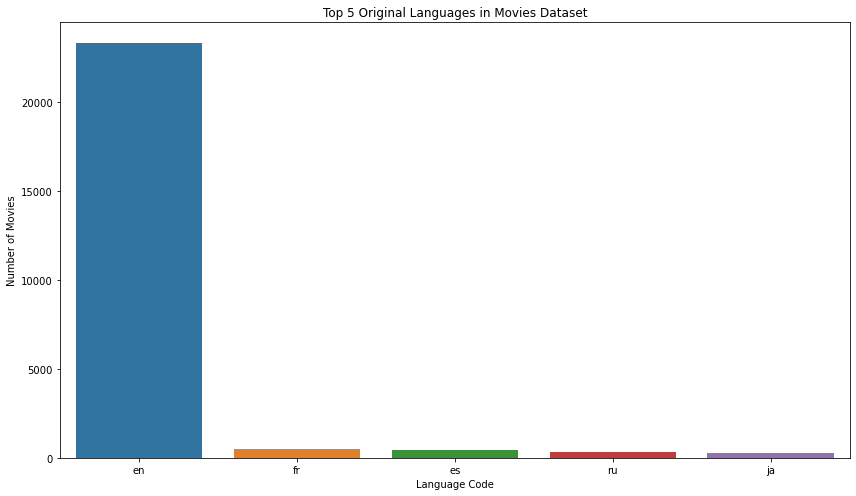

In [11]:
# Create bar plot
original_language = movies_df['original_language'].value_counts().head(5)
plt.figure(figsize=(12, 7))
sns.barplot(x=original_language.index, y=original_language.values)
plt.title('Top 5 Original Languages in Movies Dataset')
plt.xlabel('Language Code')
plt.ylabel('Number of Movies')
plt.tight_layout()
plt.show()

Insights from the bar graph for the marketing and data teams to use.

🧠 For the Data Team
Model audience preferences by language: Prioritize building models and insights around English-language films, which provide the largest volume of data and also study the relationship between language, genre, and popularity to support content strategy decisions.

🎯 For the Marketing Team
With the majority of content in English, global marketing should initially target English-dominant markets and tailor the marketing messages, visuals, and platforms based on language preferences for better engagement.


Next, top popular movies based on the data will be plotted on a bar graph. 

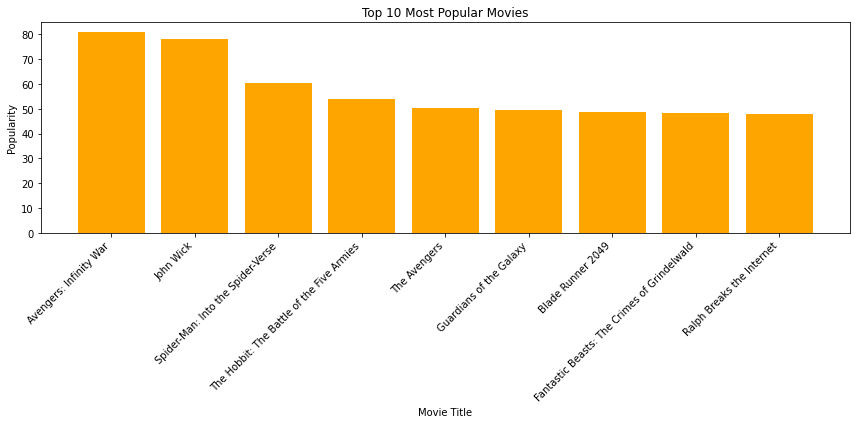

In [12]:

top_movies = movies_df[['title', 'popularity']].sort_values(by='popularity', ascending=False).head(10)


# Plot
plt.figure(figsize=(12, 6))
plt.bar(top_movies['title'], top_movies['popularity'], color='orange')
plt.title('Top 10 Most Popular Movies')
plt.xlabel('Movie Title')
plt.ylabel('Popularity')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


The data shows the top ten most popular movies according to the data are action, sci-fi, fantasy, adventure and superhero narratives. 

📈 For the Marketing Team, focus on hero and spectacle type of movies as they appeal to a broad market. In order to appeal to family oriented content, focus on emotional and humorous movies. 

✅ The data team should prioritize investment in action and fantasy genres inorder to properly appeal to all audiences despite age.

                      
                      MOVIE BUDGET
  
 🎯 In this part, a movie budget dataset will be analysed to help make strategic recommendations on the decisions to be made by the studio. 
 
 🎯 The data will be extracted, cleaned and EDA performed to better understand and make proper recommendations.

In [13]:
# Load the movie budgets dataset and display first 5 rows
aviation_df = pd.read_csv("tn.movie_budgets.csv", encoding="latin1", low_memory=False)
aviation_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [14]:
#Check dataset shape 
movies_budget_df= pd.read_csv("tn.movie_budgets.csv")

print(f"The dataset has {movies_df.shape[0]} rows")
print(f"The dataset has {movies_df.shape[1]} columns")

The dataset has 26517 rows
The dataset has 10 columns



The dataset has a total of 26517 rows and 10 columns. 

Next we check the overall information of the data. 

In [15]:
#Get info on the data
movies_budget_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB



info() function gives us a comprehensive summary of the dataset, including the total number of entries, the data types of each column (object, float64), and the number of entries in each column.

Next, we look at the summary statistics for the data.

In [16]:
#Summary Statistics for the dataset
movies_budget_df.describe()

,id
count,5782.000000
mean,50.372363
std,28.821076
min,1.000000
25%,25.000000
50%,50.000000
75%,75.000000
max,100.000000



describe() function gives a summary of the statistics of the dataset, including:

Count: Total number of entries
Mean: Average value
Std: Standard deviation
Min: Minimum value
25th percentile: 25th percentile value
50th percentile: 50th percentile value (median)
75th percentile: 75th percentile value
Max: Maximum value

In [17]:
#check the columns for the data
movies_budget_df.columns

Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')

Columns method is used to give all the columns present in the data.

Next, we check for duplicates. 

In [18]:
#Check for duplicate values
movies_budget_df.duplicated().sum()

0


The dataset has no duplicate entries.

Next step is to check for null values using the isnull().sum() fucntion. 

In [19]:
# Check for null values in the Aviation dataset as a percentage for each column
null_percentage = (movies_budget_df.isnull().sum() / len(movies_budget_df)) * 100

# Display the columns with missing values, and their percentages in descending order
null_percentage = null_percentage[null_percentage > 0].sort_values(ascending=False)
print(null_percentage)

Series([], dtype: float64)



The data has no columns with missing values.

The first visual to be plotted is scatter plot to show the relationship between a movie's cost to make and the total revenue generated. 

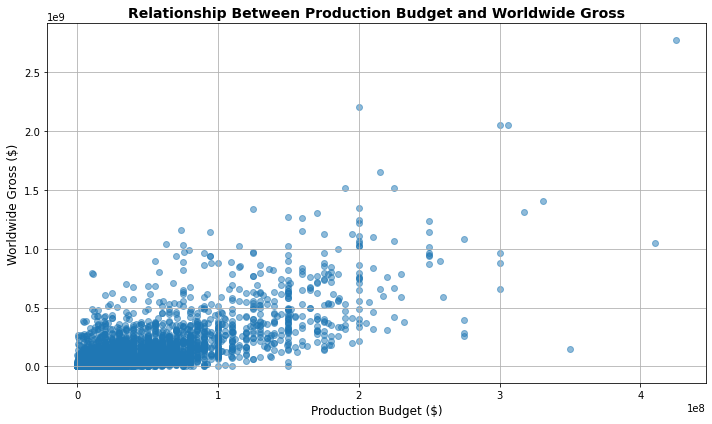

In [20]:
# Load the data from the CSV file into the DataFrame 'movies_budget_df'
movies_budget_df = pd.read_csv('tn.movie_budgets.csv')

# Clean and convert the 'production_budget' and 'worldwide_gross' columns to numeric
for col in ['production_budget', 'worldwide_gross']:
    movies_budget_df[col] = movies_budget_df[col].replace({'\$': '', ',': ''}, regex=True).astype(float)

# Create a scatter plot to visualize the relationship between production budget and worldwide gross
plt.figure(figsize=(10, 6))
plt.scatter(movies_budget_df['production_budget'], movies_budget_df['worldwide_gross'], alpha=0.5)

# Add title and labels
plt.title('Relationship Between Production Budget and Worldwide Gross', fontsize=14, fontweight='bold')
plt.xlabel('Production Budget ($)', fontsize=12)
plt.ylabel('Worldwide Gross ($)', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()



📈 The scatterplot shows that higher-budget movies tend to generate more revenue. However, a significant number of low to mid-budget films tend to have a high return on investment as well. 

📈 For the marketing team, they can develop smaller films portfolio which carry  ahigh risk but have a potential for high returns. The genre to focus on is the main main factor to be considered. 



                        Key Insights 
                        
1. High budget movies tend to generate more revenue. However, for a new studio, getting a mid-budget film can also get high returns as long as it serves the market. 

2. With the majority of content and consumption in English, prioritize building movies around English-language films, which provide the largest volume of production and consumption. 

3. Prioritize investment in action and fantasy genres inorder to properly appeal to all audiences despite age hence a large market base. 


                        Conclusions 
                      
- For the new movie studio, the best approach is a data-driven strategy that balances popular genres, efficient budget allocation and high returns. By adopting these insights, we can have a competitive positioning in the industry. 